# 주성분 분석
 - 서로 연관되어 있는 변수들이 관측되었을 때, 이 변수들이 전체적으로 가지고 있는 정보를 최대한 확보하는 적은 수의 새로운 변수를 생성하는 방법.
 - 차원을 줄이는 방법으로 성능 향상과 컬럼들의 결합에 목적이 있음. 

In [1]:
# 설문지를 이용한 주성분 분석 
data <- read.table("../Data/pasta.txt")
head(data)

,noodle,dishes,sauce
pesto_alla_Genovese,2,4,5
Marinara,1,5,1
Puttanesca,5,3,4
Primavera,2,2,3
Vongole,3,5,5
Boscaiola,4,3,2


In [2]:
# 다중 공산성 확인 : 너무 상관이 높아서 마치 쌍둥이인 데이터 찾기 
cor(data)


,noodle,dishes,sauce
noodle,1.0000000,0.1905002,0.3600411
dishes,0.1905002,1.0000000,0.3004804
sauce,0.3600411,0.3004804,1.0000000


In [4]:
# 표준화 : 평균을 0으로 표준편차는 1로 변경 

data1<- scale(data)
summary(data1)

     noodle            dishes             sauce         
 Min.   :-1.3416   Min.   :-1.36311   Min.   :-1.31112  
 1st Qu.:-0.6708   1st Qu.:-0.51117   1st Qu.:-0.62106  
 Median : 0.0000   Median :-0.08519   Median : 0.06901  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.: 0.6708   3rd Qu.: 0.97973   3rd Qu.: 0.58656  
 Max.   : 1.3416   Max.   : 1.19272   Max.   : 1.44914  

In [5]:
summary(data)

     noodle      dishes         sauce     
 Min.   :1   Min.   :2.00   Min.   :1.00  
 1st Qu.:2   1st Qu.:3.00   1st Qu.:2.00  
 Median :3   Median :3.50   Median :3.00  
 Mean   :3   Mean   :3.60   Mean   :2.90  
 3rd Qu.:4   3rd Qu.:4.75   3rd Qu.:3.75  
 Max.   :5   Max.   :5.00   Max.   :5.00  

In [6]:
sd(data1[,3])

[1] 1

In [7]:
apply(data1, 2, sd)         #열방향 :2 

noodle dishes  sauce 
     1      1      1

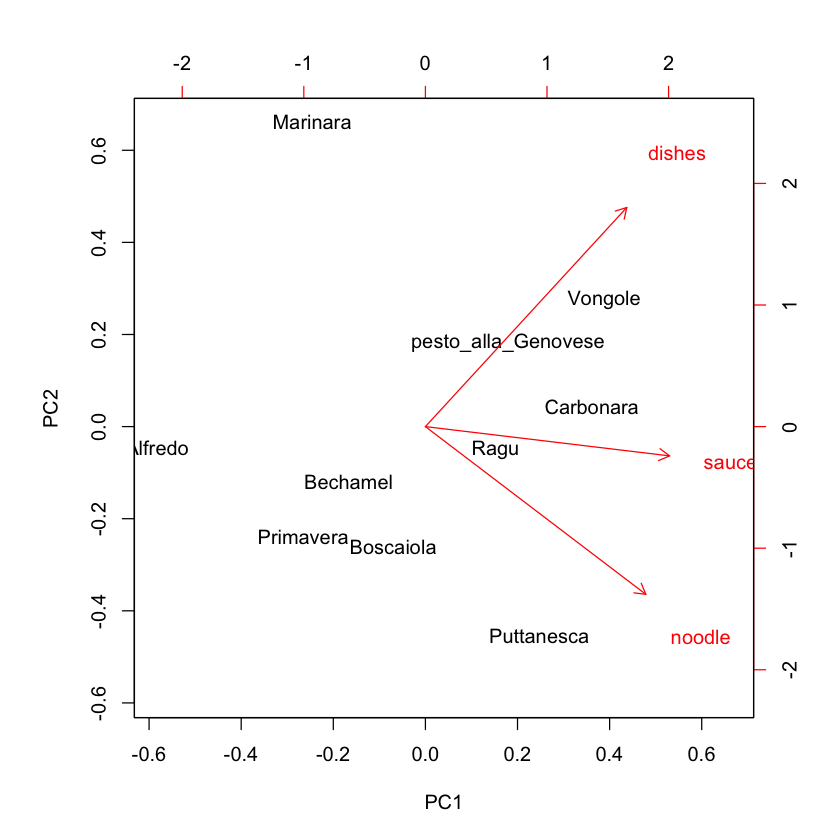

In [8]:
# 주성분 분석
p1 <- prcomp(data,scale =T)
biplot(p1)  

In [17]:
# 라면 주성분 분석
ramen <- read.table("../Data/라면.txt", header = T)
head(ramen)

X,면발,포장재,국물
신라면,2,4,5
짜파게티,5,2,1
쌀사리곰탕면,3,4,3
무파마,3,3,5
안성탕면,1,2,3
오징어짬뽕,1,3,4


In [19]:
str(ramen)

'data.frame':	8 obs. of  4 variables:
 $ X     : Factor w/ 8 levels "너구리","무파마",..: 3 8 4 2 5 6 1 7
 $ 면발  : int  2 5 3 3 1 1 3 2
 $ 포장재: int  4 2 4 3 2 3 3 3
 $ 국물  : int  5 1 3 5 3 4 4 5


In [40]:
rownames(ramen) <- ramen$X

In [41]:
ramen

,X,면발,포장재,국물
신라면,신라면,2,4,5
짜파게티,짜파게티,5,2,1
쌀사리곰탕면,쌀사리곰탕면,3,4,3
무파마,무파마,3,3,5
안성탕면,안성탕면,1,2,3
오징어짬뽕,오징어짬뽕,1,3,4
너구리,너구리,3,3,4
육계장,육계장,2,3,5


In [42]:
ramen[,2:4]

,면발,포장재,국물
신라면,2,4,5
짜파게티,5,2,1
쌀사리곰탕면,3,4,3
무파마,3,3,5
안성탕면,1,2,3
오징어짬뽕,1,3,4
너구리,3,3,4
육계장,2,3,5


In [43]:
cor(ramen[,2:4])

,면발,포장재,국물
면발,1.0000000,-0.1443376,-0.5499719
포장재,-0.1443376,1.0000000,0.5443311
국물,-0.5499719,0.5443311,1.0000000


In [44]:
# 표준화
ramen1<- scale(ramen[,2:4])
summary(ramen1)
ramen1

      면발             포장재             국물        
 Min.   :-1.1456   Min.   :-1.3229   Min.   :-1.9802  
 1st Qu.:-0.5728   1st Qu.:-0.3307   1st Qu.:-0.5401  
 Median : 0.0000   Median : 0.0000   Median : 0.1800  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.3819   3rd Qu.: 0.3307   3rd Qu.: 0.9001  
 Max.   : 1.9094   Max.   : 1.3229   Max.   : 0.9001  

,면발,포장재,국물
신라면,-0.3818813,1.322876,0.9001029
짜파게티,1.9094065,-1.322876,-1.9802263
쌀사리곰탕면,0.3818813,1.322876,-0.5400617
무파마,0.3818813,0.000000,0.9001029
안성탕면,-1.1456439,-1.322876,-0.5400617
오징어짬뽕,-1.1456439,0.000000,0.1800206
너구리,0.3818813,0.000000,0.1800206
육계장,-0.3818813,0.000000,0.9001029


In [45]:
sd(ramen1[,3])

[1] 1

In [46]:
apply(ramen1, 2, sd)

면발 포장재   국물 
     1      1      1

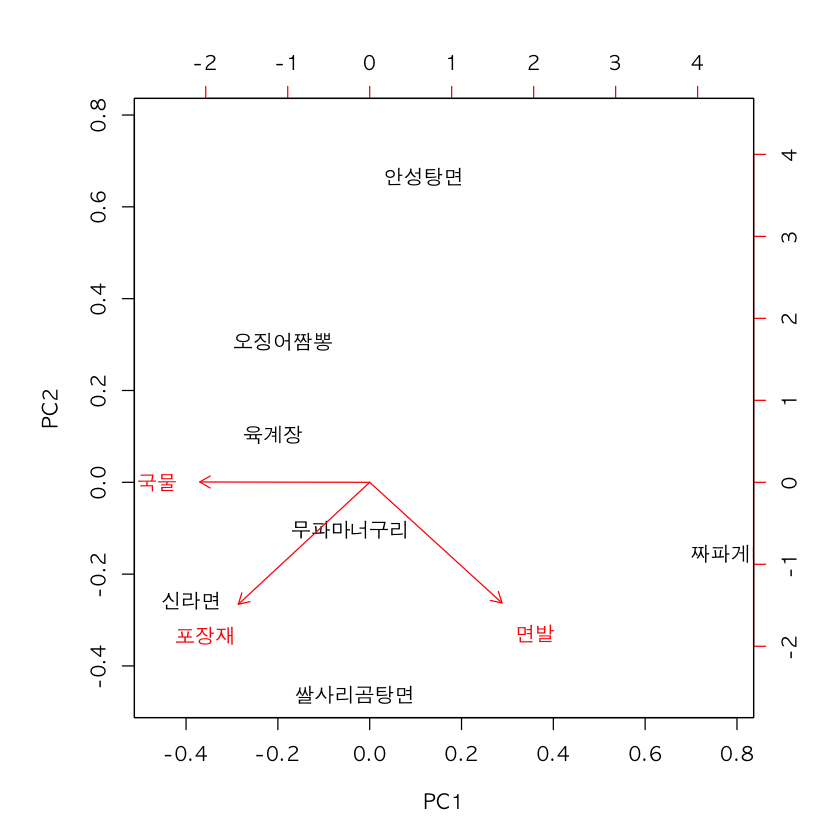

In [47]:
# 주성분 분석
ramenp1 <- prcomp(ramen1,scale =T)
options(warn=-1)
par(family='AppleGothic')

biplot(ramenp1)

---
# USArrests 
- 1973년 미국 50개 주에서 각각 10만명당 폭행, 살인, 강간으로 체포된 통계데이터 
- 또한 도시지역에 살고있ㅎ는 인구의 비율도 주얻진다.

In [48]:
head(USArrests)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


- Murder : 살인 
- Assault : 폭행
- UrbanPop : 도시 인구밀도
- Rape : 강간 

In [49]:
# 데이터의 상관 관계
cor(USArrests)

,Murder,Assault,UrbanPop,Rape
Murder,1.00000000,0.8018733,0.06957262,0.5635788
Assault,0.80187331,1.0000000,0.25887170,0.6652412
UrbanPop,0.06957262,0.2588717,1.00000000,0.4113412
Rape,0.56357883,0.6652412,0.41134124,1.0000000


In [53]:
# 주성분 분석
result <- princomp(USArrests, cor =T)
summary(result)

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4
Standard deviation     1.5748783 0.9948694 0.5971291 0.41644938
Proportion of Variance 0.6200604 0.2474413 0.0891408 0.04335752
Cumulative Proportion  0.6200604 0.8675017 0.9566425 1.00000000

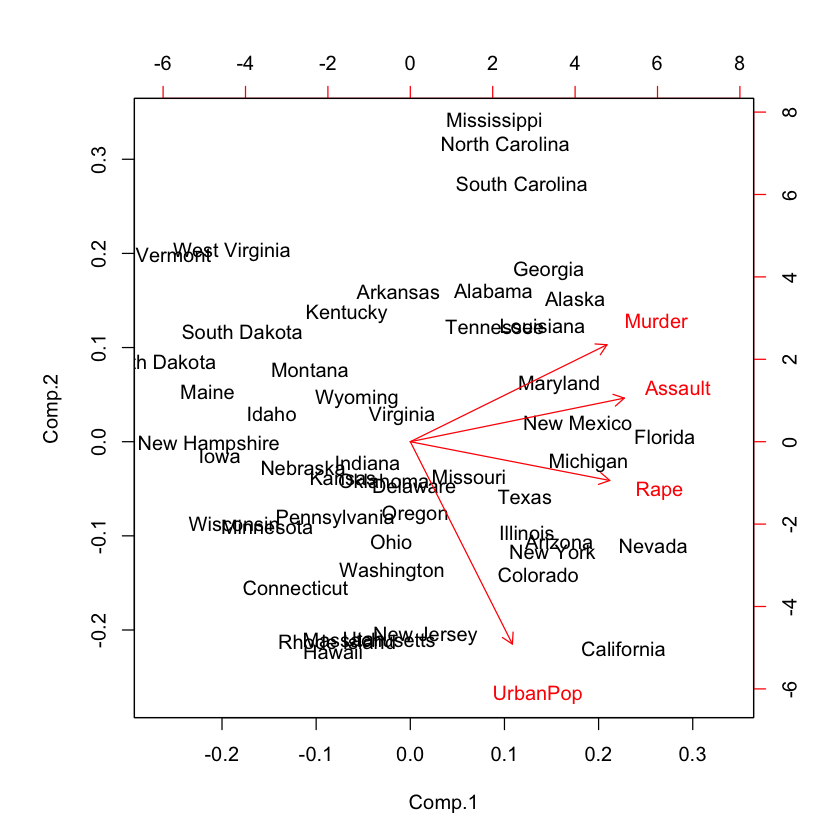

In [54]:
biplot(result)

In [55]:
result$loadings


Loadings:
         Comp.1 Comp.2 Comp.3 Comp.4
Murder    0.536  0.418  0.341  0.649
Assault   0.583  0.188  0.268 -0.743
UrbanPop  0.278 -0.873  0.378  0.134
Rape      0.543 -0.167 -0.818       

               Comp.1 Comp.2 Comp.3 Comp.4
SS loadings      1.00   1.00   1.00   1.00
Proportion Var   0.25   0.25   0.25   0.25
Cumulative Var   0.25   0.50   0.75   1.00

1주성분 = Murder *  0.536 + Assault * 0.583 + UrbanPop *  0.278 + ...

In [56]:
# 1주성분으로 새로운  변수값 생성
score <- USArrests$Murder *  0.536 + USArrests$Assault * 0.583 + USArrests$UrbanPop *  0.278 + USArrests$Rape * 0.543
score

[1] 172.2988 196.1965 214.8166 139.9753 213.0758 165.8645  93.3321 170.5118
 [9] 243.1211 163.0288  63.7014  94.0762 186.8474  99.2112  55.8091  98.3830
[17]  92.0531 183.8240  67.9280 214.6782 121.7063 194.7819  69.8619 181.1439
[25] 143.3706  90.4022  87.9663 200.9512  55.0831 131.6138 209.1557 192.1119
[33] 224.6913  42.8597 106.3430 121.3346 129.8593  93.2815 131.9573 195.9369
[41]  71.6352 147.6879 160.0767 106.3499  44.1408 124.2581 121.1996  66.1701
[49]  56.5050 122.6586

In [57]:
# States와 주성분 값으로 데이터 프레임 생성
Result <- data.frame (Stares= rownames(USArrests),Score = score) 
head(Result)

Stares,Score
Alabama,172.2988
Alaska,196.1965
Arizona,214.8166
Arkansas,139.9753
California,213.0758
Colorado,165.8645


In [58]:
# 우선수위 알아보기 
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [59]:
head(arrange(Result,desc(Score)),10)        #점수가 높을 수록 살인, 폭행, 강간비율의 높음 

Stares,Score
Florida,243.1211
North Carolina,224.6913
Arizona,214.8166
Maryland,214.6782
California,213.0758
New Mexico,209.1557
Nevada,200.9512
Alaska,196.1965
South Carolina,195.9369
Michigan,194.7819
